<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* similaridad: KNN
* Selección de hı́per-parámetros estructurales en SVM, Arboles de Decisión, k-NN y Redes Neuronales.
* Métodos de *kernel*.
* Extracción de características.
* Múltiples anotaciones

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusión y entrega: 8 de Noviembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalación

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Además de éstas se necesitará instalar **keras**, una librerı́a en python para prototipado rápido de modelos basados en redes neuronales, muy similar en espı́ritu a *sklearn*. La librerı́a puede usar *TensorFlow* o *Theano* como backend, siendo éstas las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos. Para detalles sobre la instalación puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) pendiente


<a id="primero"></a>
## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente. Los datos pueden ser descargados ejecutando el siguiente código en sistema Unix:
```
wget -O train_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
wget -O test_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev
```

> Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).
```python
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
... #same loading for test
df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values
```

> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.
```python
df_train_sentiment.shape
```

> b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.
```python
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= choose size, random_state=0)
```


> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.
```python
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
... #try yourself
word_extractor("I love to eat cake")
word_extractor("I love eating cake")
word_extractor("I loved eating the cake")
word_extractor("I do not love eating cake")
word_extractor("I don't love eating cake")
... #try yourself
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]
```


> d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?
```python
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
... #transform val and test
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
```

> e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados
```python
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()
```

> f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.
```python
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4)]
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= ...)
```

> g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización $C$ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.
```python
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=C,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4)]
```

> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.
```python
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[1], steps)
```

> i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.
```python
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], steps ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , steps ) #choose steps
```

> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.
```python
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]
```


> k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

> l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.
```python
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)
```
>> Para instalar VADER ejecute en consola:
```
pip install vaderSentiment
```

> m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.
```python
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
vocab
```

> n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.
```python
from nltk.stem.porter import PorterStemmer
wordstemmer = PorterStemmer()
wordstemmer.stem(word)
```

> o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.
```python
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
tfidf_model.transform(texts_train)
... #for val and test
```

> p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?
```python
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )
```

> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.
```python
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)
```

> r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente
```python
test_pred = log_model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)
```

> s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

<a id="segundo"></a>
## 2. Problema de Múltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una única posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definición del *ground truth* en algunos casos puede resultar bastante difícil de definir o bastante costoso, por ejemplo en problemas médicos donde se deben realizar invasivos exámenes para conocer la "verdad absoluta". Como alternativa se pueden recolectar múltiples anotaciones desde personas inexpertas en el área para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajará en el caso en que contamos con múltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a través de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicción trabajado será el mismo de la actividad anterior, el análisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la página del autor.
```
wget http://fprodrigues.com//mturk-datasets.tar.gz
```

De esta manera trabajaremos con el archivo *mturk_answers.csv* en la carpeta *sentiment polarity* que se puede cargar con pandas. En este archivo se tendrán múltiples filas/registros por cada dato de entrenamiento, cada uno representando la etiqueta que entregó una persona (*worker*) a ese dato, los detalles de columnas son:
* *WorkerId*: identificador de la persona que etiquetó/anotó el dato
* *Input.id*: identificador del dato a etiquetar/anotar
* *Input.original_sentence*: texto original del dato
* *Input.stemmed_sent*: texto pre-procesado
* *Input.true_sent*: sentimiento real (*ground truth*) del dato
* *Answer.sent*:   etiqueta/anotación que entregó la persona

```python
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv") 
```

> El objetivo de la actividad será el de obtener un modelo predictor del *ground truth* sin entrenar directamente con esto, sino que utilizar las múltiples anotaciones de las personas

### Importante
* Deberá crear un conjunto aleatorio de pruebas que solo contenga los textos y el sentimiento *ground truth* (sin repeticiones)
* Los valores de *ground truth* están **solo para evaluar**, no puede utilizarlos para entrenar o tomar decisiones en su modelo.
* La métrica de evaluación será el *accuracy score*
```python
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)
```

#### Sugerencias
Para representar los textos, a diferencia de lo visto en la sección 1, se puede utilizar lo que son la representación vectorial de palabras (*word vectors*), a través de modelos especializados entrenados para aprender una representación en que palabras similares estén cercanas en el espacio vectorial. Puede utilizar los vectores livianos de __[GLOVE](https://nlp.stanford.edu/projects/glove/)__ en su versión entradas en textos de Wikipedia con 6 billones de palabras/tokens.
```python
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)
```
> Para descargar GLOVE
```
wget http://nlp.stanford.edu/data/glove.6B.zip
```

<a id="primero"></a>
## 1. Sentiment Analysis en Texto

In [1]:
#carga y re-etiquetado de datos

import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1


#same loading for test
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows_t = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows_t, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1


df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values


{'whiskers': [<matplotlib.lines.Line2D at 0x1edaae38470>,
 'caps': [<matplotlib.lines.Line2D at 0x1edaae38b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1edaae38048>],
 'medians': [<matplotlib.lines.Line2D at 0x1edaae38f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edaae42518>],
 'means': []}

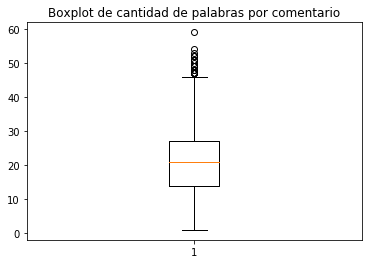

In [3]:
# descripión de datos
import statistics 


#exploración de palabras por texto en general
words_c= [len(sentence.split()) for sentence in df_train_text]

import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot de cantidad de palabras por comentario')
ax1.boxplot(words_c)

{'whiskers': [<matplotlib.lines.Line2D at 0x1edaaeba828>,
 'caps': [<matplotlib.lines.Line2D at 0x1edaaebaeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1edaaeba400>],
 'medians': [<matplotlib.lines.Line2D at 0x1edaaec2588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edaaec28d0>],
 'means': []}

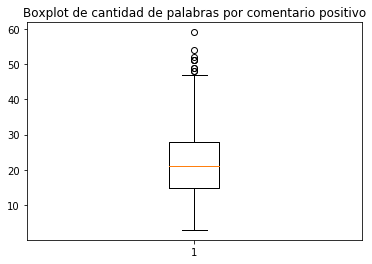

In [4]:
#texto de comentarios positivos


pos=df_train.query('Sentiment==1')['Text']
words_pos= [len(sentence.split()) for sentence in pos]
fig2, ax2 = plt.subplots()
ax2.set_title('Boxplot de cantidad de palabras por comentario positivo')
ax2.boxplot(words_pos)

{'whiskers': [<matplotlib.lines.Line2D at 0x25acb05f4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x25acb05fb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x25acb05f0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x25acb05ff98>],
 'fliers': [<matplotlib.lines.Line2D at 0x25acb069588>],
 'means': []}

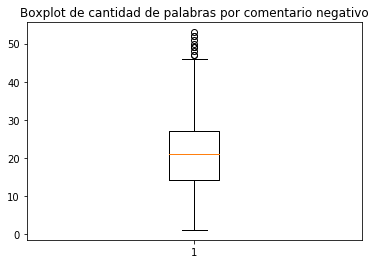

In [4]:
#testo de comentarios negativos

neg=df_train.query('Sentiment==0')['Text']
words_neg= [len(sentence.split()) for sentence in neg]
fig3, ax3 = plt.subplots()
ax3.set_title('Boxplot de cantidad de palabras por comentario negativo')
ax3.boxplot(words_neg)

En primer lugar, se puede otra en los tres boxplot la tendencia a tener al menos más de 15 palabras por comentario, siendo la mediana cercana a 20, sin embargo, en los tres boxplot hay varios outliers en la parte superior, lo que significa que en sí los datos deben tener una desviación estándar considerable. Por otra parte, es de notar que estos outliers son más en el bloxplot de comentarios positivos que en el de negativos, pero ambos boxplot prácticamente coinciden en la mediana y la posición del bigote superior. 

In [5]:
#definición de conjunto de validación 


#como hay más de 3500 de ejemplos, se eligen 700 de estos para validación


from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size=700, random_state=0)

In [6]:
#normalizacion de texto


import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

La importancia de la normalización radica en primer lugar en la eliminación de palabras cortas, como artículos o adverbios, que no entregan ningún sentido de valoración a un comentario, es decir, no permiten saber a connotación de este, por lo que es mejor sacarlos para evitar tener información innecesaria. Además, al tener todas las palabras en minúsculas se hace más fácil el procesamiento de estas, lo que contribuye a facilitar el entrenamiento. La lematización también contribuye enormemente a todo esto explicado.

In [7]:
#representación vectorial (term frequency)

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#train
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

#val
features_val = vectorizer.transform(texts_val)
vocab_v = vectorizer.get_feature_names()
distval=list(np.array(features_val.sum(axis=0)).reshape(-1,))

#test
features_test = vectorizer.transform(texts_test)
vocab_t = vectorizer.get_feature_names()
distest=list(np.array(features_test.sum(axis=0)).reshape(-1,))

#10 most frequent words
used=features_train.sum(axis=0)
words_freq = [(word, used[0, idx]) for word, idx in     vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
most=words_freq[:10]
print("Palabras más comunes:")
for word, freq in most:
    print(word, freq)


Palabras más comunes:
film 476
movie 451
one 212
like 204
ha 196
story 169
time 146
character 138
make 131
good 118


Es de destacar que, de estas palabras sólo "ha" no entrega información relevante respecto de la película, mientras que las dos primeras se encuentran como las más comunes por ser con las que se suele comenzar un comentario respeto a una película, así como también story o character suelen usarse en este tipo de comentarios. Además, es necesario mencionar que palabras como like pueden tener dos significados diferentes, lo que de cierta forma dificulta la predicción.

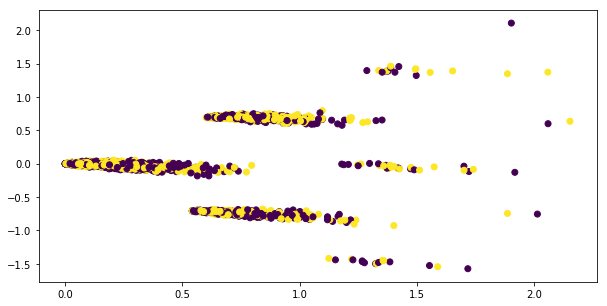

In [8]:
#lsa

from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

Al ser este un proceso de reducción de dimensionalidad, el análisis que se puede hacer tiene relación con la agrupación y distribución de los datos. En este caso, se observa que ambas clases tienden a agruparse en ciertos sectores, lo que puede tener relación con la connotación de los comentarios, ya que en algunos se observa una clara predominancia de alguna de las dos clases. Además, la cantidad de datos de una de las clases, representada por el color amarillo, si presenta mayor dispersión que la otra, en el sentido de observar más valores que se encuentran fuera de los grandes grupos que se forman.

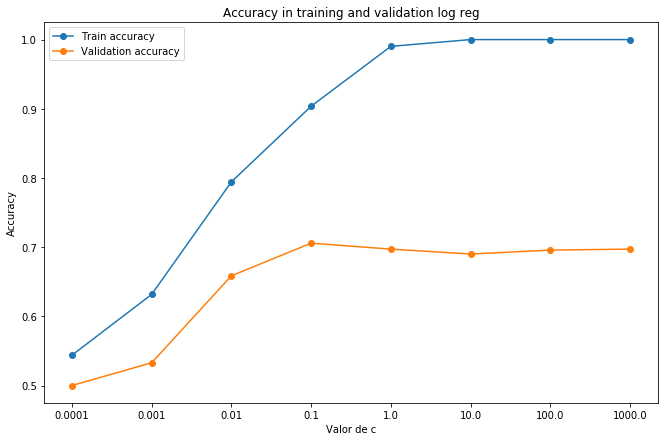

In [9]:

#regularización
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression(solver='liblinear')
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4, dtype=float)]

acc_t=[]
acc_v=[]
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= i)
    acc_t.append(train_acc)
    acc_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion
plt.figure(figsize=(11,7))
plt.plot(acc_t,marker="o")
plt.plot(acc_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation log reg')
plt.show()

De acuerdo con lo observado, esta variable lo que hace es controlar el overfitting, ya que mientras mayor sea su valor, mayor también será el overfitting, aumentando también la accuracy en el entrenamiento, pero disminuyendo en la validación. En otras palabras, señala el “grado de libertad” del modelo, es decir, que tanto posible overfitting se le permite generar al modelo. Es por esto que su valor esperado óptimo sería el que minimice el overfitting, pero también buscando un mínimo de aprendizaje, para evitar generar modelos con poca accuracy, ocurriendo esto en este caso en el valor de c=0.01 o c=0.001, y probablemente en un valor entre ambos.

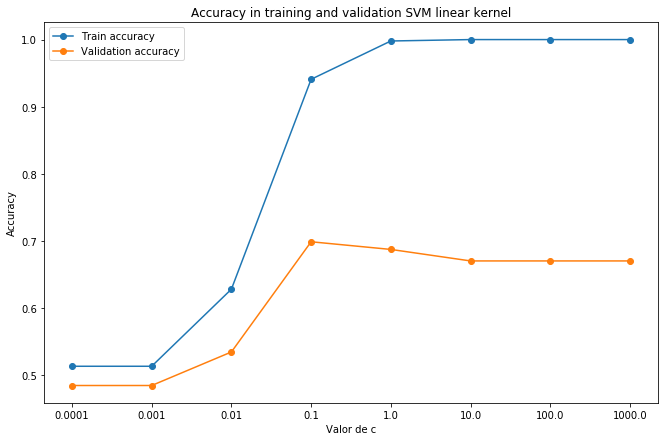

In [11]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    model= SVM()
    model.set_params(C=param,kernel=kernel,gamma="auto") 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Cs = [10**i for i in np.arange(-4,4, dtype=float)]
svm_t=[]
svm_v=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param= i)
    svm_t.append(train_acc)
    svm_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y validacion svm linear kernel
plt.figure(figsize=(11,7))
plt.plot(svm_t,marker="o")
plt.plot(svm_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation SVM linear kernel')
plt.show()

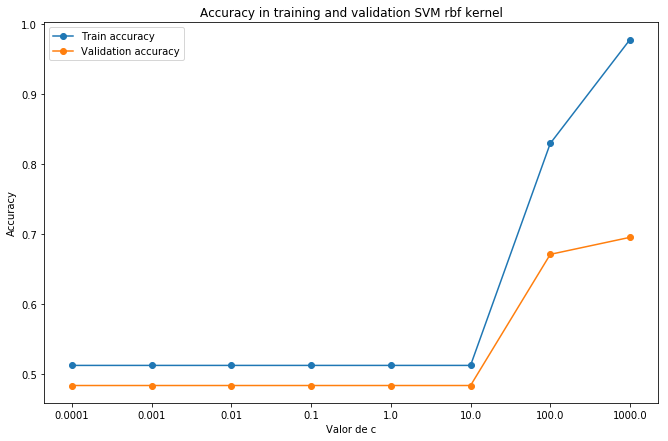

In [12]:
Cs = [10**i for i in np.arange(-4,4, dtype=float)]
svm_t=[]
svm_v=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param= i,kernel="rbf")
    svm_t.append(train_acc)
    svm_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion svm rbf kernel
plt.figure(figsize=(11,7))
plt.plot(svm_t,marker="o")
plt.plot(svm_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation SVM rbf kernel')
plt.show()

Al usar svm lo que se busca es tener el mayor mínimo margen posible, y clasificar correctamente la mayor cantidad posible de datos, en este sentido, C representa la tendencia a obtener una mayor cantidad de instancias clasificadas correctamente, disminuyendo el margen del hiperplano separador (en el caso de un kernel lineal), lo que se traduce en una mayor accuracy en el entrenamiento. Esto puede ser comprobado claramente en el gráfico presentado, ya que también al aumentar la exactitud de clasificación en entrenamiento, aumenta en general el overfitting, aumentando también en algunos casos la accuracy en el conjunto de validación. Luego, el mejor valor para C debería ser uno que no comprometa en gran cantidad el overfitting para lograr mayor exactitud en la fase de entrenamiento. En el caso de rbf la interpretación es la misma, sin embargo, de acuerdo a lo que se observa en los gráficos, la forma en la que va progresando el aumento de overfitting es diferente, ya que son diferentes kernels, lo que se traduce en una diferencia en el óptimo de c en este caso, y en la forma en que el overfitting aumenta respecto a un aumento del valor de c.

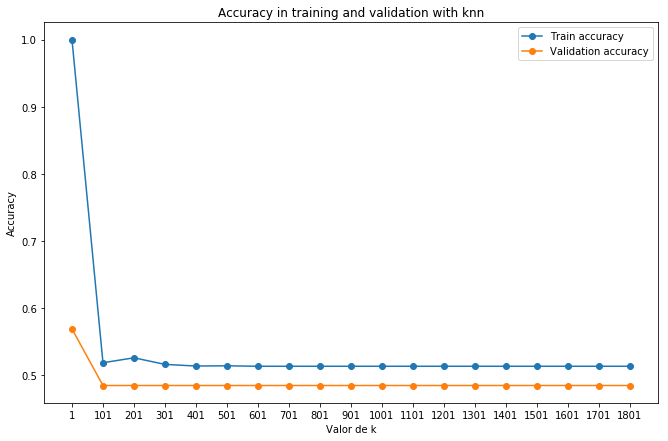

In [13]:
#knn
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

steps=100
Ks = np.arange(1, 1829, steps) #ajuste de tamaño de auerdo a cantidad de datos de entrenaminto

acct_knn=[]
accv_knn=[]

for i in Ks:
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param= i)
    acct_knn.append(train_acc)
    accv_knn.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion knn
plt.figure(figsize=(11,7))
plt.plot(acct_knn,marker="o")
plt.plot(accv_knn,marker="o")
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.xticks(range(len(Ks)), Ks)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation with knn')
plt.show()

De acuerdo con lo observado, el valor de k tiene directa relación con la tendencia a overfitting, siendo en este caso la relación contraria a los dos anteriores casos, ya que acá mientras mayor sea el valor de k, menos overfitting se produce, sin embargo, a mayor valor de k el proceso de entrenamiento y predicción toma mayor tiempo. Esto se explica al conocer quee el valor de k representa la cantidad de vecinos cercanos que se considerarán, es decir, el tamaño de los samples, es por esto que mientras más grande sea más cuesta computacionalmente, además de esto se deriva el carácter de este valor de determinar qué tanta tolerancia al ruido existe en el modelo. En cuanto al valor óptimo, se puede decir que este modelo por la forma en la que reacciona al aumento de k (en el sentido de overftting y accuracy), tiene menor poder de predicción en general en este problema que los dos anteriores.

In [15]:
#definicion de datos a usar y de arbol de desición
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

steps=100
Depths = np.arange(1, 1829, steps ) #choose steps
SamplesS = np.arange(2, 1829 , steps ) #choose steps

Param Max-D=  1 Min-samples-S=  2
Param Max-D=  101 Min-samples-S=  2
Param Max-D=  201 Min-samples-S=  2
Param Max-D=  301 Min-samples-S=  2
Param Max-D=  401 Min-samples-S=  2
Param Max-D=  501 Min-samples-S=  2
Param Max-D=  601 Min-samples-S=  2
Param Max-D=  701 Min-samples-S=  2
Param Max-D=  801 Min-samples-S=  2
Param Max-D=  901 Min-samples-S=  2
Param Max-D=  1001 Min-samples-S=  2
Param Max-D=  1101 Min-samples-S=  2
Param Max-D=  1201 Min-samples-S=  2
Param Max-D=  1301 Min-samples-S=  2
Param Max-D=  1401 Min-samples-S=  2
Param Max-D=  1501 Min-samples-S=  2
Param Max-D=  1601 Min-samples-S=  2
Param Max-D=  1701 Min-samples-S=  2
Param Max-D=  1801 Min-samples-S=  2


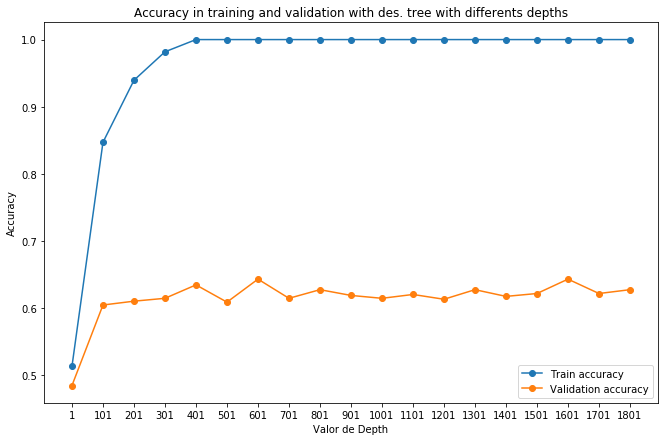

In [16]:
#errores variando depth

acct_dd=[]
accv_dd=[]

for i in Depths:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_d= i)
    acct_dd.append(train_acc)
    accv_dd.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion des tree
plt.figure(figsize=(11,7))
plt.plot(acct_dd,marker="o")
plt.plot(accv_dd,marker="o")
plt.xlabel('Valor de Depth')
plt.ylabel('Accuracy')
plt.xticks(range(len(Ks)), Ks)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation with des. tree with differents depths')
plt.show()

Param Max-D=  None Min-samples-S=  2
Param Max-D=  None Min-samples-S=  102
Param Max-D=  None Min-samples-S=  202
Param Max-D=  None Min-samples-S=  302
Param Max-D=  None Min-samples-S=  402
Param Max-D=  None Min-samples-S=  502
Param Max-D=  None Min-samples-S=  602
Param Max-D=  None Min-samples-S=  702
Param Max-D=  None Min-samples-S=  802
Param Max-D=  None Min-samples-S=  902
Param Max-D=  None Min-samples-S=  1002
Param Max-D=  None Min-samples-S=  1102
Param Max-D=  None Min-samples-S=  1202
Param Max-D=  None Min-samples-S=  1302
Param Max-D=  None Min-samples-S=  1402
Param Max-D=  None Min-samples-S=  1502
Param Max-D=  None Min-samples-S=  1602
Param Max-D=  None Min-samples-S=  1702
Param Max-D=  None Min-samples-S=  1802


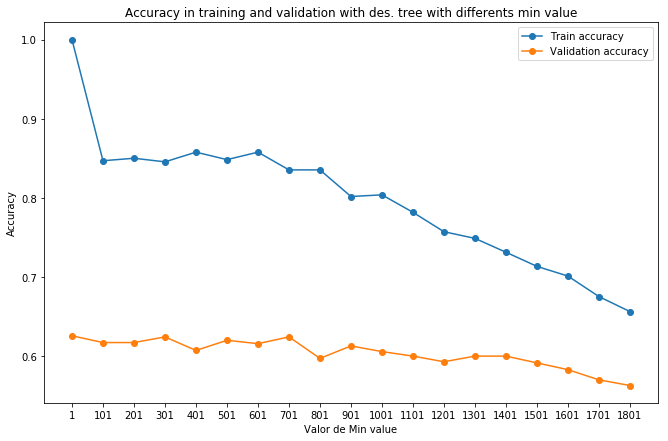

In [17]:
#errores  variando min samples

acct_dm=[]
accv_dm=[]

for i in SamplesS:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_m= i)
    acct_dm.append(train_acc)
    accv_dm.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion des tree
plt.figure(figsize=(11,7))
plt.plot(acct_dm,marker="o")
plt.plot(accv_dm,marker="o")
plt.xlabel('Valor de Min value')
plt.ylabel('Accuracy')
plt.xticks(range(len(Ks)), Ks)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation with des. tree with differents min value')
plt.show()

La diferencia más notoria en este caso es que al aumentar el valor de la profundidad también aumenta el overfitting, mientras que con el valor de min value ocurre exactamente lo contrario, lo que tiene directa relación con la forma en que estos valores influyen en la forma en que actúa el modelo, lo que también explica que al inicio, al variar el valor de Depth, el cambio que se produce es brusco, llegando a un valor máximo de error de forma rápida, en el caso de min value la disminución se produce de forma más regular, una vez pasado un pequeño instante en el que disminuye el overfitting de forma rápida. Con respecto a la mejor accuracy sin tener mucho overfitting se puede decir que ambos modelos tienen sus mejores valores relativamente similares en ciertas fases, sin embargo, en este caso por el comportamiento más regular observado en la variación de min value, es mejor dejar como “None” el valor de Depth, y elegir un valor de min value entre 1401 y 1501, obteniendo un valor considerable de overfitting, pero también bastante mejor accuracy en  el conjunto de validación que en el resto de modelos.

Using TensorFlow backend.


Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512
Neuron hidden =  1024


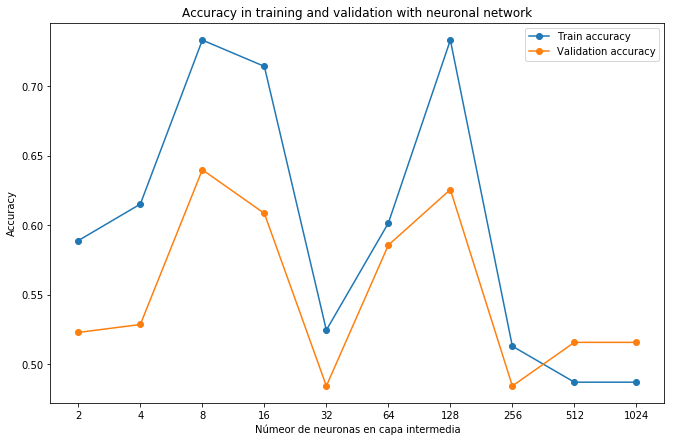

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,11)]


acct_nn=[]
accv_nn=[]

for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, i)
    acct_nn.append(train_acc)
    accv_nn.append(test_acc)
    
#grafico con red neuronal
plt.figure(figsize=(11,7))
plt.plot(acct_nn,marker="o")
plt.plot(accv_nn,marker="o")
plt.xlabel('Número de neuronas en capa intermedia')
plt.ylabel('Accuracy')
plt.xticks(range(len(N_h)), N_h)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation with neuronal network')
plt.show()

Luego de ejecutar algunas veces el código donde se realiza la clasificación utilizando redes neuronales, se puede notar que el comportamiento no es siempre igual, lo que claramente influirá en las siguientes etapas, sin embargo, en todas estas ejecuciones hay comportamientos que se mantienen a pesar de que cambien los valores, uno de estos es la tendencia a no tener un comportamiento uniforme, es decir, en algunos sectores al aumentar la cantidad de neuronas disminuye el overfitting o la accuracy, mientras que en otros se produce lo contrario, incluso en algunos momentos se mantiene o se produce underfitting. Todo esto se debe a la naturaleza de este método, que es muy diferente a los anteriormente usados. De acuerdo con lo probado, el mejor valor de cantidades de neuronas suele estar cercano a 64. Otro punto importante a destacar, es que, en comparación con métodos anteriores, este es el que ocupa una mayor cantidad de recursos del computador, lo que también influye en el tiempo de ejecución del modelo.

In [19]:
#pretención de score en test con el mejor modelo de los vistos
#svm rbf
model_rbf, t_acc_rbf, te_acc_rbf = do_SVM(features_train,labels_train,features_test,labels_test, param= 60,kernel="rbf")

print("train with svm rbf kernel: ",t_acc_rbf)
print("accuracy with svm rbf kernel test: ",te_acc_rbf)

train with svm rbf kernel:  0.7477224947442186
accuracy with svm rbf kernel test:  0.6330894766460327


Como se está hablando de exactitud, lo que en si se busca es obtener un valor que sea mayor a 0.5, por lo que los valores obtenidos, considerando el overfitting generado en el modelo, puede decirse que son bastante positivos, sin embargo, se hace necesario contar con un método que ayude a determinar qué tan buenos son los valores obtenidos.

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
print ("accuracy score with vader: ",accuracy_score(labels_test, vader_pred_test))

accuracy score with vader:  0.638716938660664


Si se toma el valor obtenido mediante el método VADER, y se compara con lo obtenido por uno de los mejores modelos posibles de acuerdo con los valores con los que se trabaja en este caso, se puede notar que la accuracy obtenida en el conjunto de testing con el modelo anteriormente trabajado resulta muy similar a la obtenida en este caso, existiendo una diferencia aproximadamente de 0.01 entre ambos modelos, por lo que se comprueba que existe una cierta calidad en el modelo seleccionado.

In [21]:
#model selected
model_ds, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_m= 1651)

#knn,des tree,
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model_ds.predict_proba(x_word)
    
too=[]
c=0
for i in vocab:
    too.append([i,word_scores[c]]) 
    c+=1
    

pos=sorted(too,key=lambda x: x[1][0], reverse=True)
print("Palabras más negativas")
for i in range(0,5):
    print (i+1,". ", pos[i][0])
    
print("\n")
print("Palabras más positivas")
neg=sorted(too,key=lambda x: x[1][1], reverse=True)
for i in range(0,5):
    print (i+1,". ", neg[i][0])
    
    

Param Max-D=  None Min-samples-S=  1651
Palabras más negativas
1 .  neither
2 .  dull
3 .  joke
4 .  nothing
5 .  bad


Palabras más positivas
1 .  beauty
2 .  challenging
3 .  engrossing
4 .  fast
5 .  powerful


Ya que el modelo que se seleccionó como el mejor para clasificar no funciona bajo probabilidades, se decide usar otro de los modelos que entrega un buen resultado predictivo en esta sección, este modelo es el de decision tree con min value=1651. Al obtener las palabras más negativas y más positivas se puede tener de cierta forma un indicador de la calidad del modelo, llegando a que en este caso el modelo elegido si tiene cierto nivel de calidad, ya que las palabras más negativas son en general adjetivos que indican cierta sensación negativa ya sea en alguna película o en general, como aburrido o malo, además de palabras que suelen usarse en contexto negativo, como nada o tampoco, mientras que las palabras más positivas suelen ser también adjetivos o sustantivos de connotación positiva, como bello, fascinante o desafiante, mientras que la presencia de palabras como rápida o meditación pueden tener relación con el contexto en general de las oraciones en las que se usan, de lo que derivaría su carácter positivo. 

In [23]:
#se busca mejorar accuracy mediante cambio de métodos en lo realizado en c)
from nltk.stem.porter import PorterStemmer

#se parte realizando un proceso similar al realizado en c, pero ahora con wordstemmer
def st_word(wor):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(wor)

def word_extractor_2(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ st_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if (word not in commonwords and (not word.isdigit())): #delete stopwords
            words+=" "+word
    return words

n_train = [word_extractor_2(text) for text in df_train_text]
n_val = [word_extractor_2(text) for text in df_val_text]
n_test = [word_extractor_2(text) for text in df_test_text]

In [24]:
#TF representation

#train
vectorizern = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizern.fit(n_train)
featuresN_train = vectorizern.transform(n_train)
vocabN = vectorizern.get_feature_names()

#val
featuresN_val = vectorizern.transform(n_val)
vocabN_v = vectorizern.get_feature_names()

#test
featuresN_test = vectorizern.transform(n_test)
vocabN_t = vectorizern.get_feature_names()

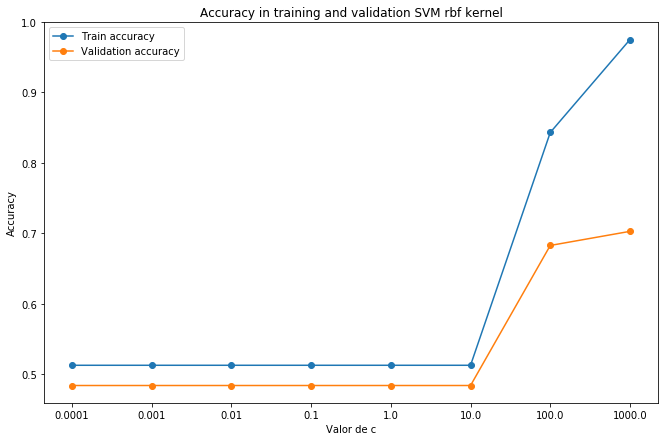

In [25]:
#primero se comparará con el modelo elegido, en relación a la variación del parámetro con un gráfico similar al ya realizado

Cs = [10**i for i in np.arange(-4,4, dtype=float)]
svm_t=[]
svm_v=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(featuresN_train,labels_train,featuresN_val,labels_val, param= i,kernel="rbf")
    svm_t.append(train_acc)
    svm_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion svm rbf kernel
plt.figure(figsize=(11,7))
plt.plot(svm_t,marker="o")
plt.plot(svm_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation SVM rbf kernel')
plt.show()

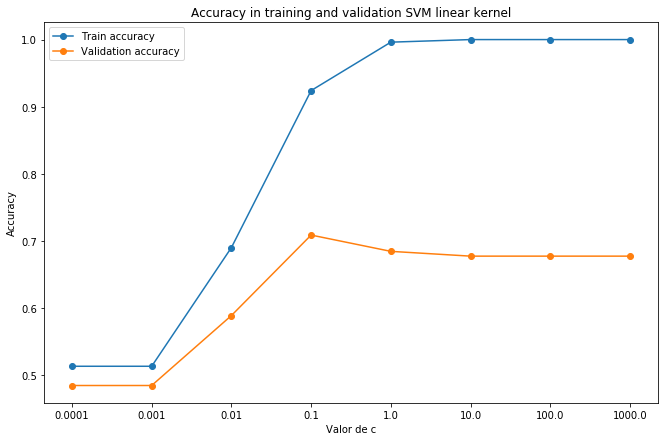

In [26]:
#luego, se prueba con linear kernel, que fue otro de los modelos que mostraron mejores resultados en las pruebas anteriores

svm_t=[]
svm_v=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(featuresN_train,labels_train,featuresN_val,labels_val, param= i)
    svm_t.append(train_acc)
    svm_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion svm linear kernel
plt.figure(figsize=(11,7))
plt.plot(svm_t,marker="o")
plt.plot(svm_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation SVM linear kernel')
plt.show()

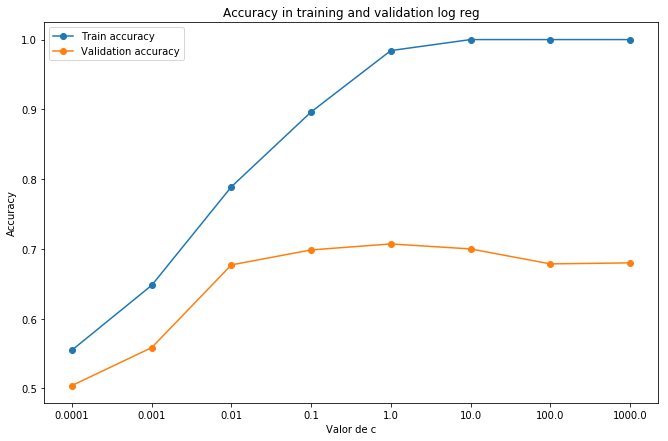

In [27]:
#finalmente se prueba con el modelo de regresión logística

acc_t=[]
acc_v=[]
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(featuresN_train,labels_train,featuresN_val,labels_val, param= i)
    acc_t.append(train_acc)
    acc_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion
plt.figure(figsize=(11,7))
plt.plot(acc_t,marker="o")
plt.plot(acc_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation log reg')
plt.show()

In [28]:
#rbf
model_rbf, t_acc_rbf, te_acc_rbf = do_SVM(featuresN_train,labels_train,featuresN_test,labels_test, param= 50,kernel="rbf")

print("train with svm rbf kernel: ",t_acc_rbf)
print("accuracy with svm rbf kernel test: ",te_acc_rbf)

#log reg
model_log, t_acc_log, te_acc_log = do_LOGIT(featuresN_train,labels_train,featuresN_test,labels_test, param= 0.01)

print("train with log regression: ",t_acc_log)
print("accuracy with log regression: ",te_acc_log)

#rbf
model_lin, t_acc_lin, te_acc_lin = do_SVM(featuresN_train,labels_train,featuresN_test,labels_test, param= 0.0136)

print("train with svm rbf kernel: ",t_acc_lin)
print("accuracy with svm rbf kernel test: ",te_acc_lin)


train with svm rbf kernel:  0.7824106517168886
accuracy with svm rbf kernel test:  0.6648846370287
train with log regression:  0.7890679747722494
accuracy with log regression:  0.6812042768711312
train with svm rbf kernel:  0.7764540995094604
accuracy with svm rbf kernel test:  0.6651660101294317


En una primera instancia, el cambio de método en el lematizador, combinado con la eliminación de números de acuerdo con los gráficos obtenidos no muestra ninguna mejora considerable, ya que los gráficos son muy similares a los obtenidos anteriormente, por lo que para buscar si existe realmente alguna mejora se vuelven a elegir valores para los respectivos parámetros en estos modelos que se encuentren en la zona en la que hay más probabilidades de tener mejores resultados. Al obtener la accuracy realizando estas pruebas se observa que en general existe una mejora en todos los modelos, ya que antes se observaba que la accuracy solía estar entre 0.63 y 0.64, mientras que ahora está entre 0.66 y 0.68, manteniendo un overfitting cercano a 0.11. El mejor modelo de los probados acá resulta ser la regresión logística, con un overfitting cercano a 0.1 y accuracy de 0.68, lo que representa una mejora importante respecto a lo obtenido anteriormente.

In [29]:
#Uso de TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

#re-carga de datos para evitar errores
df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size=700, random_state=0)

texts_train = [word_extractor_2(text) for text in df_train_text]
texts_val = [word_extractor_2(text) for text in df_val_text]
texts_test = [word_extractor_2(text) for text in df_test_text]


tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
texts_train=tfidf_model.transform(texts_train)
texts_val=tfidf_model.transform(texts_val)
texts_test=tfidf_model.transform(texts_test)



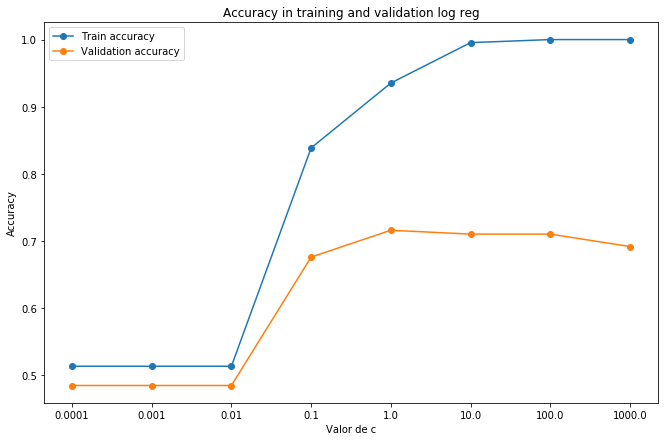

In [30]:
acc_t=[]
acc_v=[]
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(texts_train,labels_train,texts_val,labels_val, param= i)
    acc_t.append(train_acc)
    acc_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion
plt.figure(figsize=(11,7))
plt.plot(acc_t,marker="o")
plt.plot(acc_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation log reg')
plt.show()

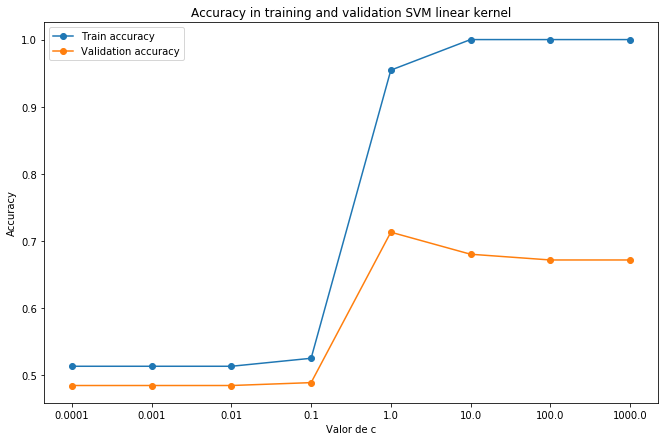

In [31]:
svm_t=[]
svm_v=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(texts_train,labels_train,texts_val,labels_val, param= i)
    svm_t.append(train_acc)
    svm_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion svm linear kernel
plt.figure(figsize=(11,7))
plt.plot(svm_t,marker="o")
plt.plot(svm_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation SVM linear kernel')
plt.show()

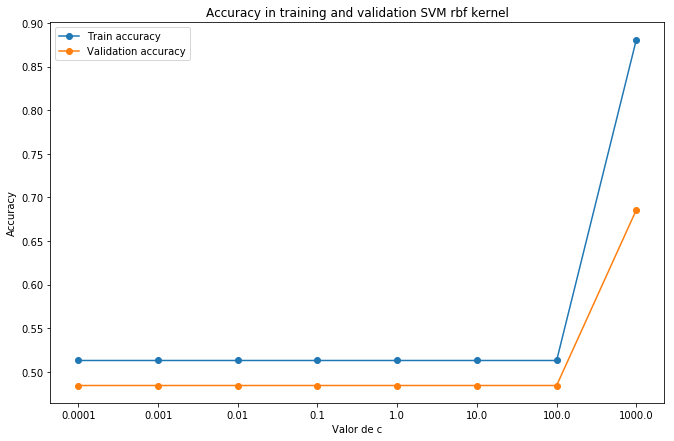

In [32]:
Cs = [10**i for i in np.arange(-4,4, dtype=float)]
svm_t=[]
svm_v=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(texts_train,labels_train,texts_val,labels_val, param= i,kernel="rbf")
    svm_t.append(train_acc)
    svm_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion svm rbf kernel
plt.figure(figsize=(11,7))
plt.plot(svm_t,marker="o")
plt.plot(svm_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation SVM rbf kernel')
plt.show()

In [33]:

#rbf
model_rbf, t_acc_rbf, te_acc_rbf = do_SVM(texts_train,labels_train,texts_test,labels_test, param= 669,kernel="rbf")

print("train with svm rbf kernel: ",t_acc_rbf)
print("accuracy with svm rbf kernel test: ",te_acc_rbf)

#log reg
model_log, t_acc_log, te_acc_log = do_LOGIT(texts_train,labels_train,texts_test,labels_test, param= 0.068)

print("train with log regression: ",t_acc_log)
print("accuracy with log regression: ",te_acc_log)

#linear svm
model_lin, t_acc_lin, te_acc_lin = do_SVM(texts_train,labels_train,texts_test,labels_test, param= 0.19)

print("train with svm linear kernel: ",t_acc_lin)
print("accuracy with svm linear kernel test: ",te_acc_lin)

train with svm rbf kernel:  0.7995795374912403
accuracy with svm rbf kernel test:  0.6848621271806415
train with log regression:  0.7967764540995095
accuracy with log regression:  0.6812042768711312
train with svm linear kernel:  0.8023826208829713
accuracy with svm linear kernel test:  0.6862689926842994


Luego de realizar pruebas buscando mejoras cambiando la forma en que se realiza el proceso de lematización, se buscó complementar este método con un uso de TF-IDF, con lo que de acuerdo a los gráficos obtenidos al variar los parámetros en los 3 mejores modelos del trabajo realizado anteriormente, se obtienen notables diferencias, siendo básicamente estas un desplazamiento a la derecha em los gráficos, y una tendencia bastante más uniforme y pronunciada, es decir, que, por ejemplo si antes en alguno de los gráficos al aumentar desde 0.001 a 0.01 aumentaba el overfitting a amabas accuracys, en este caso se mantiene constante en ese tramo, pero luego la tendencia de aumento será mucho más pronunciada, lo que puede tener relación con la forma en que opera este método. Por lo explicado anteriormente, al realizar la predicción en el conjunto de testing se observan mejoras con respecto a lo anteriormente obtenido, ya que ahora todos los modelos, manteniendo el overfitting cercano a 0.01, obtienen accuracy en el conjunto de testing cercano a 0.685, lo que en la tendencia general representa una mejora al tener mayor similitud en capacidad los tres modelos probados. Otro aspecto importante para notar es que con estos métodos probados en esta parte aumenta el costo computacional.

In [34]:
#uso de métricas auxiliares

from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
    
print("Análisis de modelo svm linear kernel (última versión) :") 
score_the_model(model_lin, texts_test, labels_test )
print("\n")
print("Análisis de modelo svm rbf kernel (última versión) :") 
score_the_model(model_rbf, texts_test, labels_test )
print("\n")
print("Análisis de modelo log reg (última versión) :") 
score_the_model(model_log, texts_test, labels_test )

Análisis de modelo svm linear kernel (última versión) :
Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.63      0.92      0.75      1784
           +       0.85      0.45      0.59      1770

    accuracy                           0.69      3554
   macro avg       0.74      0.69      0.67      3554
weighted avg       0.74      0.69      0.67      3554



Análisis de modelo svm rbf kernel (última versión) :
Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.63      0.92      0.75      1784
           +       0.85      0.45      0.58      1770

    accuracy                           0.68      3554
   macro avg       0.74      0.68      0.67      3554
weighted avg       0.74      0.68      0.67      3554



Análisis de modelo log reg (última versión) :
Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -      

En primer lugar, los modelos presentan estadísticas similares, por lo que el análisis acá realizado será generalizado para los tres modelos, esta decisión se encuentra justificada en la similitud existente en F1-score avg weighted. De acuerdo a lo observado, es claro que el problema se encuentra en la clasificación de datos positivos más que negativos, ya que el recall en esta clase es menor al 0.5, lo que quiere decir que de los datos que en verdad son positivos, hubo más clasificados mal que los que fueron bien clasificados. Por otra parte, la clase positiva tiene precisión más alta que la negativa, pero ninguna es menor a 0.5, por lo que, ya sea una clase positiva o negativa, la cantidad de datos que se clasificaron como alguna de éstas y estaban correctas es mayor a las que no, pero en la clase positiva es mayor a la negativa, así como en recall el valor obtenido para la clase negativa es bastante superior a la positiva.

In [32]:
#variación de pesos en las clases

classes_weights = {0: 90, 1: 70} 
model= SVM()
model.set_params(C=0.005,kernel="linear",gamma="auto",class_weight=classes_weights) 
model.fit(texts_train, labels_train)
score_the_model(model, texts_test, labels_test)

print ("train accuracy: ",model.score(texts_train, labels_train))

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.63      0.92      0.75      1784
           +       0.85      0.46      0.60      1770

    accuracy                           0.69      3554
   macro avg       0.74      0.69      0.68      3554
weighted avg       0.74      0.69      0.68      3554

train accuracy:  0.8325157673440785


Luego de realizar diferentes pruebas se puede señalar que, en este caso, este método no produce beneficios en el problema, y si los produce no son lo suficientemente significativos. En primer lugar, se trabajó con los datos que han dado mejores resultados, utilizando los mejores modelos posibles. Con estos datos se pudo notar que el efecto general de modificar los pesos de cada clase es un desplazamiento de la curva de accuracy en función del parámetro, por lo que aparte de el accuracy en el test se muestra el accuracy en training para comprobar un posible overfitting. Considerando este overfitting, en general, mientras mayor sea la diferencia en proporción entre los pesos de las clases a predecir, menor será el poder de clasificación del modelo. Es posible que al realizar las suficientes cantidades de pruebas variando las proporciones se logre una mejora, pero lo más probable es que esta sea prácticamente mínima.

In [35]:
#texts_train, labels_train
test_pred = model_log.predict_proba(texts_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.49335699 0.50664301]
Raw text:  based on a david leavitt story , the film shares that writer's usual blend of observant cleverness , too-facile coincidence and slightly noxious preciousness .

True sent:  0.0 -- Pred sent:  [0.54037231 0.45962769]
Raw text:  i never thought i'd say this , but i'd much rather watch teens poking their genitals into fruit pies !

True sent:  1.0 -- Pred sent:  [0.53003293 0.46996707]
Raw text:  there's nothing more satisfying during a summer of event movies than a spy thriller like the bourne identity that's packed with just as much intelligence as action .

True sent:  0.0 -- Pred sent:  [0.52668264 0.47331736]
Raw text:  cal is an unpleasantly shallow and immature character with whom to spend 110 claustrophobic minutes .

True sent:  1.0 -- Pred sent:  [0.46568154 0.53431846]
Raw text:  the best animated feature to hit theaters since beauty and the beast 11 years ago .

True sent:  0.0 -- Pred sent:  [0.52875606 0.47124

En este caso, estrictamente hablando, las etiquetas de los datos son categóricas, siendo una clase “positivo” y la otra “negativo”, sin embargo, si se reinterpreta como una tendencia es posible que estas etiquetas sean tratadas como continuas, en forma de probabilidad, que es lo que se realiza acá. De acuerdo con la información entregada, resulta bastante útil la representación continua/probabilística, ya que entrega información respecto de a qué tendencia se encuentra más cercana una frase, lo que permite tener un acercamiento más concreto a qué considera el modelo internamente para tomar la decisión. El beneficio de usar alguna de estas dos clases en vez de la otra tiene relación con la información obtenida, ya que mediante la representación probabilística se puede por ejemplo saber que palabras son más positivas y cuales son más negativas, lo que puede ser usado en algún tipo de análisis posterior, mientras que la representación categórica se encuentra más asociada a la clasificación que a otro tipo de información adicional que se pueda obtener.

Para finalizar, se debe comentar acerca de los diferentes tipos de modelos y representaciones utilizadas en esta sección


En primer lugar, es importante señalar que diferentes familias de modelos presentan diferentes comportamientos, bajo este criterio en una instancia inicial se descartaron varios modelos, realizando el análisis posterior relacionado con la capacidad predictiva de los modelos sólo con la regresión logística y ambos svm, que fueron los que daban mejores valores en una primera instancia. 

Luego, al ir modificando la representación utilizando diferentes métodos, se llegó a un aumento de la capaciad predictora en los modelos de alrededor del 5%, con lo que también a medida que se aplicaban estos diferentes métodos la diferencia entre la capacidad de los modelos se hacía cada vez menor, hasta llegar a un momento en que la diferencia de exactitud entre uno u otro era casi nula, es por esto que, en este problema, las mejoras están asociadas a un cambio de representación más que a un cambio de modelo o de parámetros, una vez identificada la zona en de parámetros en la que es probable obtener la mejor clasificación en algún modelo dado.

Finalmente, considerando todos los análisis y comportamientos observados, el mejor modelo en este caso resulta ser svm, ya sea con kernel linear o rbf, ya que es el que entrega mejores niveles de accuracy, sin tener demasiado overfitting, y al mismo tiempo no se demora una cantidad excesiva de tiempo, a diferencia de modelos como el de red neuronal.

<a id="segundo"></a>
## 2. Problema de Múltiples Anotaciones

In [1]:
#se debe partir cargando los datos a usar
#from sklearn.metrics import accuracy_score, accuracy_score(y_true, y_pred)


import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None
##Input.true_sent,Answer.sent
##0=neg, 1=pos
dat = pd.read_csv("mturk_answers.csv")
dat=dat.dropna()

#se parte cambiando los valores  pos y neg por valores numéricos
dat['Answer.sent'][dat['Answer.sent'] == "neg"] = 0
dat['Answer.sent'][dat['Answer.sent'] == "pos"] = 1
dat['Input.true_sent'][dat['Input.true_sent'] == "neg"] = 0
dat['Input.true_sent'][dat['Input.true_sent'] == "pos"] = 1

#para mejor procesamiento posterior se ordenan los datos por índice
dat=dat.sort_values(by=['Input.id'])



#carga de datos a ocupar
train_pre=dat["Input.original_sentence"]
train_post=dat["Input.stemmed_sent"]
giv_lab=dat["Answer.sent"]
tru_lab=dat["Input.true_sent"]
index=dat["Input.id"]


In [2]:
#creación de conjunto aleatorio de pruebas y conjunto de validación
import random 
from sklearn.model_selection import train_test_split

train_text, val_text, giv_tr,giv_val,tru_tr,tru_val, ind_tr,ind_val  = train_test_split(train_post, giv_lab,tru_lab,index, test_size=8323, random_state = 0, shuffle=False)

random.seed(1) 
set_test=[[],[]]
a=0

while (a<1000):
    im=random.randint(0, len(train_text)-1)
    if (train_text.iloc[im].split(" ") not in set_test[0]):
        set_test[0].append(train_text.iloc[im].split(" "))
        set_test[1].append(tru_tr.iloc[im])
        tw=train_text.iloc[0:im]
        su=train_text.iloc[im+1:len(train_text)]
        train_text=su.append(tw)
        tw=tru_tr.iloc[0:im]
        su=tru_tr.iloc[im+1:len(tru_tr)]
        tru_tr=su.append(tw)
        tw=giv_tr.iloc[0:im]
        su=giv_tr.iloc[im+1:len(giv_tr)]
        giv_tr=su.append(tw)
        tw=ind_tr.iloc[0:im]
        su=ind_tr.iloc[im+1:len(ind_tr)]
        ind_tr=su.append(tw)
        a+=1




Antes de usar word vectors, se decide limitar parar mayor simplicidad en entrenamiento, validación, y prueba, cada comentario a las 20 palabras más comunes en él. Además, para la representación de cada comentario en forma de word vectors se decide usar glove, ya que en cuanto a tiempos y recursos son una buena alternativa, la cual se prefiere por sobre instalar por ejemplo word2vector.

In [3]:
#word vectors usando glove

EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE,  encoding="utf8") as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
        


In [4]:
train_text, val_text

usable_train=[]
usable_val=[]


#split de lineas a usar

for line in train_text: 
    usable_train.append(line.split(" ")) #new lines has the new format lines=new_lines
    
for line in val_text: 
    usable_val.append(line.split(" ")) #new lines has the new format lines=new_lines
    
    
u_train=[]
u_val=[]


#preparación de data de entrenamiento, se usa el promedio entre todas las palabras de una oración para cada valor de word embeddinga
for phrase in usable_train:
    up=[]
    for word in phrase:
        ar=embeddings_index.get(word)
        up.append(ar)
    definitive=[]
    count=0 
    for wrd in range(0,300):
        for i in up:
            if (i is None):
                continue
            count+=i[wrd]
        definitive.append(count/300)
        count=0
    u_train.append(definitive)
    

for phrase in usable_val:
    up=[]
    for word in phrase:
        up.append(embeddings_index.get(word))
    definitive=[]
    count=0 
    for wrd in range(0,300):
        for i in up:
            if (i is None):
                continue
            count+=i[wrd]
        definitive.append(count/300)
        count=0
    u_val.append(definitive)
        
u_test=[]

for phrase in set_test[0]:
    up=[]
    for word in phrase:
        up.append(embeddings_index.get(word))
    definitive=[]
    count=0 
    for wrd in range(0,300):
        for i in up:
            if (i is None):
                continue
            count+=i[wrd]
        definitive.append(count/300)
        count=0
    u_test.append(definitive)

set_test[0]=u_test

#transofrmación a lista de los datos que aún no lo son
#giv_tr,giv_val,tru_tr,tru_val, ind_tr,ind_val

giv_tr=giv_tr.tolist()
giv_val=giv_val.tolist()
tru_tr=tru_tr.tolist()
tru_val=tru_val.tolist()
ind_tr=ind_tr.tolist()
ind_val=ind_val.tolist()


La principal dificultad de este problema se encuentra en encontrar alguna forma en que se puedan combinar las predicciones que se harán de el sentimiento entregada por cada persona de alguna frase, ya que al ser este un valor que varía dependiendo de quien lo ponga, no es del todo confiable, por lo que debe aprovecharse que se posee más de una etiqueta por frase. Es por esto que, este problema consiste en dos partes, siendo la primera la predicción de las etiquetas entregadas por los clientes, para lo que se utilizarán diferentes modelos entre los ya vistos en la parte 1, luego, en la segunda parte se utilizarán diferentes tipos de métodos para juntar las diferentes etiquetas dadas para una frase y así poder entregar una aproximación del ground truth.

Una primera propuesta para el segundo procesamiento de etiquetas es por cada comentario que tenga el mismo número de etiqueta, contar la clase que tenga mayor cantidad de valores, y elegir esta como la aproximación de ground truth. En una primera instancia, se revisarán diferentes tipos de modelos de clasificación manteniendo para la segunda parte el método ya descrito.

In [5]:
from sklearn.metrics import accuracy_score

#creación de función de la parte 2 de la clasificación
def ground_aproximation(res_model,indexes):
    ret=[]
    a=0
    one=0
    zero=0
    actual=1
    for res in res_model:
        if (a>0 and indexes[a]!=indexes[a-1]):
            if (one>zero):
                aa=1
            elif(one<zero):
                aa=0
            else:
                aa=0
            ap=[aa] * actual
            ret.extend(ap)
            one=zero=actual=0
        if (res==1):
            one+=1
        elif (res==0):
            zero+=1
        a+=1
        actual+=1
    return ret


#creación de función que permita conocer real accuracy
def real_accuracy(pred,real,indexes):
    a=0
    rel=[]
    pre=[]
    added=[]
    for ind in indexes:
        if (ind not in added):
            added.append(ind)
            rel.append(real[a])
            pre.append(pred[a])
        a+=1
    return accuracy_score(rel, pre)


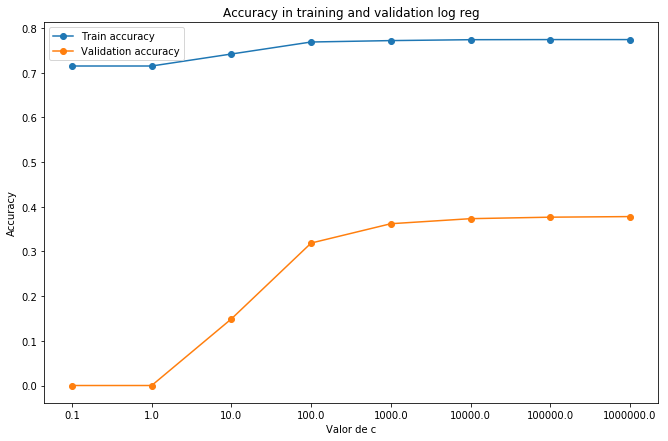

In [8]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#creación de modelo de regresión logística para este caso, aumentando el valor del parámetro para generar un gráfico similar
#a los de la parte 1

def do_LOGIT2(x,y,z,xv,yv,zv,indt,indv,param):
    model= LogisticRegression(solver='liblinear')
    model.set_params(C=param)
    model.fit(x,y)
    ynew = model.predict(x)
    fin_y=ground_aproximation(ynew,indt)
    train_acc = real_accuracy(fin_y,z,indt)
    yvnew = model.predict(xv)
    fin_yv=ground_aproximation(yvnew,indv)
    test_acc = real_accuracy(fin_yv,zv,indv)
    return model, train_acc, test_acc


Cs = [10**i for i in np.arange(-1,7, dtype=float)]
acc_t=[]
acc_v=[]


for i in Cs:
    model, train_acc, test_acc = do_LOGIT2(u_train,giv_tr,tru_tr,u_val,giv_val,tru_val,ind_tr,ind_val,param= i)
    acc_t.append(train_acc)
    acc_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion
plt.figure(figsize=(11,7))
plt.plot(acc_t,marker="o")
plt.plot(acc_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation log reg')
plt.show()

In [9]:
model, train_acc, test_acc = do_LOGIT2(u_train,giv_tr,tru_tr,u_val,giv_val,tru_val,ind_tr,ind_val,param= 10000)

print("train with log reg: ",train_acc)
print("accuracy with log reg: ",test_acc)

train with log reg:  0.7741566609491137
accuracy with log reg:  0.37350199733688416


Con respecto a los resultados obtenidos probando diferentes tipos de modelos se debe mencionar lo siguiente:



En primer lugar, se notó en una primera instancia que en este caso los tiempos de demora en una gran cantidad de modelos resultan insostenible, llegando a utilizar una gran cantidad de recursos, y demorándose tiempos cercanos a 30 minutos, en el mejor de los casos, en llegar a un gráfico como los presentados en la sección anterior, es por esto que se decide no incluir estos modelos en esta parte. Sin embargo, es necesario mencionar que se obtuvieron resultados similares a los obtenidos en el gráfico presentado acá (similares en cuanto a rendimiento del modelo).


Luego, con respecto al gráfico presentado, se destaca la baja capacidad predictiva en general del modelo, ya que presenta una alta tendencia a overfitting, la que disminuye a medida aumenta el valor de c, pero no a un nivel que permita calificar al modelo desarrollado como un buen predictor.


En base al análisis realizado surge la duda de si este comportamiento se debe en sí a la representación de los datos, o se encuentra más asociado a la segunda etapa de la predicción, es decir, la etapa en la que se mezclan las diferentes predicciones para poder dar una sola valoración a un comentario en específico es por esto que se decide graficar y analizar el rendimiento de los modelos sin considerar el ground truth.

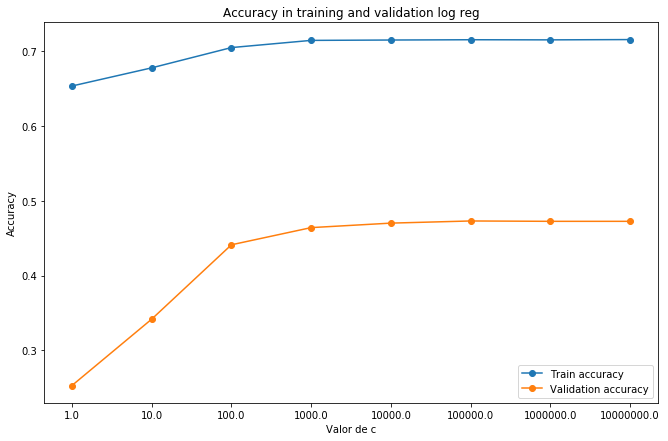

In [10]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT3(x,y,xv,yv, param):
    model= LogisticRegression(solver='liblinear')
    model.set_params(C=param)
    model.fit(x,y)
    ynew = model.predict(x)
    train_acc = accuracy_score(ynew, y)
    yvnew = model.predict(xv)
    test_acc = accuracy_score(yvnew, yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(0,8, dtype=float)]

acc_t=[]
acc_v=[]
for i in Cs:
    model, train_acc, test_acc = do_LOGIT3(u_train,giv_tr,u_val,giv_val, param= i)
    acc_t.append(train_acc)
    acc_v.append(test_acc)
    
#grafico de accuracy en entrenamiento y valudacion
plt.figure(figsize=(11,7))
plt.plot(acc_t,marker="o")
plt.plot(acc_v,marker="o")
plt.xlabel('Valor de c')
plt.ylabel('Accuracy')
plt.xticks(range(len(Cs)), Cs)
plt.legend(['Train accuracy',"Validation accuracy"])
plt.title('Accuracy in training and validation log reg')
plt.show()

In [11]:
model, train_acc, test_acc = do_LOGIT3(u_train,giv_tr,u_val,giv_val,param= 10000)

print("train with log reg: ",train_acc)
print("accuracy with log reg: ",test_acc)

train with log reg:  0.714704445530044
accuracy with log reg:  0.4700228283071008


En este caso, se decidió sólo realizar una regresión logística para poder comparar lo acá realizado con lo realizado en el punto anterior. En este caso, se encuentra que, a pesar de que el rendimiento sigue siendo bajo, una parte de este si se encuentra afectada por la segunda parte de la predicción. En este caso, el overfitting sigue siendo bastante alto, pero la accuracy en etapa de testing llega casi al 50%, por lo que puede que una mejor representación de los datos ya sea utilizando algún otro tipo de Word vectors u otro tipo de representación, mejore el rendimiento general del modelo. De todas formas, para poder tener estadísticas respecto a la clasificación, se realizará un reporte de clasificación.

In [12]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
    
score_the_model(model,u_val,giv_val)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.79      0.40      0.53      6217
           +       0.28      0.69      0.40      2106

    accuracy                           0.47      8323
   macro avg       0.53      0.54      0.46      8323
weighted avg       0.66      0.47      0.49      8323



En este caso, el recall de los datos negativos es menor al de los positivos, lo que quiere decir que de los datos que pertenecen en realidad a la clase que determina el modelo, hubieron menos mejor clasificados en la clase negativa que en la positiva, sin embargo, de todos formas el recall de la clase positiva no es notoriamente alto Por otra parte, la precisión en la clase positiva es notoriamente baja, sobre todo si se compara con la de la clase negativa. A continuación por lo tanto, se decide variar los pesos en las clases para ver si el rendimiento mejora.

In [32]:
#variación de pesos en las clases

classes_weights = {0: 11, 1:6} 
model= LogisticRegression(solver='liblinear',class_weight=classes_weights)
model.set_params(C=0.8)
model.fit(u_train,giv_tr)
score_the_model(model, u_val,giv_val)

new = model.predict(u_train)
print ("train accuracy: ",accuracy_score(giv_tr,new))

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.77      0.69      0.73      6217
           +       0.31      0.40      0.34      2106

    accuracy                           0.62      8323
   macro avg       0.54      0.55      0.54      8323
weighted avg       0.65      0.62      0.63      8323

train accuracy:  0.672311784182815


Al momento de varias de diferentes formas los pesos de cada clase, se descubre que, al menos en la primera parte, si es posible aumentar notablemente la perfomance del modelo, llegando en el mejor de los a no tener overfitting con un score de 0.66, lo que se logra con la relación 2:1. Además, se probaron relaciones de 5:3, 11:4, 11:5 y 11:6, las que obtuvieron respectivamente una score de entrenamiento y test de 0.69 y 0.6, 0.68 y 0.62, 0.66 y 0.65, y 0.67 y 0.62, e acuerdo a los resultados obtenidos, se procede a ver si este comportamiento se mantiene al incluir la segunda parte de la predicción.

In [38]:
classes_weights = {0: 2, 1:1} 
model1= LogisticRegression(solver='liblinear',class_weight=classes_weights)
model1.set_params(C=30)
model1.fit(u_train,giv_tr)
ynew = model1.predict(u_train)
fin_y=ground_aproximation(ynew,ind_tr)
train_acc = real_accuracy(fin_y,tru_tr,ind_tr)
yvnew = model1.predict(u_val)
fin_yv=ground_aproximation(yvnew,ind_val)
test_acc = real_accuracy(fin_yv,tru_val,ind_val)
print("Training real accuracy [2:1 version, c=30]: ",train_acc)
print("Validation real accuracy [2:1 version, c=30]: ",test_acc)
print("\n")

classes_weights = {0: 5, 1:3} 
model2= LogisticRegression(solver='liblinear',class_weight=classes_weights)
model2.set_params(C=30)
model2.fit(u_train,giv_tr)
ynew = model2.predict(u_train)
fin_y=ground_aproximation(ynew,ind_tr)
train_acc = real_accuracy(fin_y,tru_tr,ind_tr)
yvnew = model2.predict(u_val)
fin_yv=ground_aproximation(yvnew,ind_val)
test_acc = real_accuracy(fin_yv,tru_val,ind_val)
print("Training real accuracy [5:3 version, c=30]: ",train_acc)
print("Validation real accuracy [5:3 version, c=30]: ",test_acc)
print("\n")

classes_weights = {0: 11, 1:4} 
model3= LogisticRegression(solver='liblinear',class_weight=classes_weights)
model3.set_params(C=30000)
model3.fit(u_train,giv_tr)
ynew = model3.predict(u_train)
fin_y=ground_aproximation(ynew,ind_tr)
train_acc = real_accuracy(fin_y,tru_tr,ind_tr)
yvnew = model3.predict(u_val)
fin_yv=ground_aproximation(yvnew,ind_val)
test_acc = real_accuracy(fin_yv,tru_val,ind_val)
print("Training real accuracy [11:4 version, c=30000]: ",train_acc)
print("Validation real accuracy [11:4 version, c=30000]: ",test_acc)
print("\n")

classes_weights = {0: 11, 1:5} 
model4= LogisticRegression(solver='liblinear',class_weight=classes_weights)
model4.set_params(C=65)
model4.fit(u_train,giv_tr)
ynew = model4.predict(u_train)
fin_y=ground_aproximation(ynew,ind_tr)
train_acc = real_accuracy(fin_y,tru_tr,ind_tr)
yvnew = model4.predict(u_val)
fin_yv=ground_aproximation(yvnew,ind_val)
test_acc = real_accuracy(fin_yv,tru_val,ind_val)
print("Training real accuracy [11:5 version, c=65]: ",train_acc)
print("Validation real accuracy [11:5 version, c=65]: ",test_acc)
print("\n")
    
classes_weights = {0: 11, 1:6} 
model5= LogisticRegression(solver='liblinear',class_weight=classes_weights)
model5.set_params(C=0.7)
model5.fit(u_train,giv_tr)
ynew = model5.predict(u_train)
fin_y=ground_aproximation(ynew,ind_tr)
train_acc = real_accuracy(fin_y,tru_tr,ind_tr)
yvnew = model5.predict(u_val)
fin_yv=ground_aproximation(yvnew,ind_val)
test_acc = real_accuracy(fin_yv,tru_val,ind_val)
print("Training real accuracy [11:6 version, c=0.7]: ",train_acc)
print("Validation real accuracy [11:6 version, c=0.7]: ",test_acc)
print("\n")

Training real accuracy [2:1 version, c=30]:  0.6883933676386507
Validation real accuracy [2:1 version, c=30]:  0.7436750998668442


Training real accuracy [5:3 version, c=30]:  0.7335620354488279
Validation real accuracy [5:3 version, c=30]:  0.6125166444740346


Training real accuracy [11:4 version, c=30000]:  0.6255002858776444
Validation real accuracy [11:4 version, c=30000]:  0.8209054593874834


Training real accuracy [11:5 version, c=65]:  0.675242995997713
Validation real accuracy [11:5 version, c=65]:  0.7556591211717709


Training real accuracy [11:6 version, c=0.7]:  0.6978273299028016
Validation real accuracy [11:6 version, c=0.7]:  0.6657789613848203




En los valores acá presentados se observa que la accuracy varió considerando la segunda parte, y comparando con el ground truth. Obteniendo en general resultados bastante positivos, ya que en ningún caso se obtiene menos de 0.6 de accuracy. Por otra parte, los resultados mejoraron notablemente con respecto a lo obtenido sin modificar los pesos de las clases, llegando en algunos casos a superar un valor de 0.7 de accuracy en el conjunto de validación, manteniendo un underfitting cercano a 0.07. De entre estos 5 modelos, los modelos 1, 3 y 5 presentan los mejores resultados, siendo el quinto el que entrego un menor under/overfitting, siendo aproximadamente 0.03, aunque esto no quiere decir que lo obtenido en los otros dos modelos sea un mal resultado, por lo que se concluye que estos cualquiera de estos tres modelos cumple con el objetivo deseado.

Para finalizar esta sección, se concluye que es posible utilizar las múltiples anotaciones para llegar a una predicción de un valor real, sin embargo, si no se utiliza de forma correcta, puede llegarse a tener tiempos de cómputo inmanejables, por lo que cobra mayor importancia que en otros casos la representación de los datos. Es por esta razón que en este caso se eligió sólo trabajar con el modelo de regresión logística. Por otra parte, se destaca el uso de variación de los pesos originales de las clases para poder llegar a mejores resultados de predicción, lo que en este caso fue lo que permitió llegar a buenos valores de score o accuracy.

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.